In [2]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as io
import os 
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
import seaborn as sns
import process_2p as p2p
import lick_behav_analysis as behav
import classify_2p as c2p
from scalebars import add_scalebar
from scipy.stats import chi2_contingency



#Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30
cmap= "coolwarm"

In [12]:
folder = '/Users/savani/Downloads/2p_data/fasted 30 sucrose'
all_avg_f, all_baseline_data, all_aligned_f, all_f = p2p.process_2p_folder(folder, align = 'lick', success = 'success')


In [87]:
from cmap import Colormap

cm = Colormap('crameri:vik').to_mpl()
# 'cmocean:balance'
# 'colorbrewer:rdbu'
# colorcet:cet_d1a

In [1]:
fig, ax = plt.subplots(1, figsize=(8, 5))
for cell in range(all_avg_f.shape[0]):
    all_avg_f[cell, :] = p2p.moving_average(all_avg_f[cell, :], 2)

ascending_order = np.argsort(np.nanmean(all_avg_f[:, 75:105], axis=1))
sorted_avg_mean = all_avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.85, vmax=1.15, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = all_avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/untracked_fed_heatmap.pdf')
fig, ax = plt.subplots(1, figsize=(8, 5))


sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='PuGn')
ax.vlines(x = 75, ymin = -1, ymax = all_avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
sb = add_scalebar(ax, matchx=False, sizex=1*15, labelx='1 second', matchy=False, sep=4, sizey=-5, labely='5 ROIs',loc='lower left', bbox_to_anchor=(0, 0, 0.1, 0.4))

# plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/untracked_fed_heatmap.pdf')


NameError: name 'plt' is not defined

In [9]:
folder = '/Users/savani/Downloads/2p_data/fed 30 sucrose'
all_avg_fed, all_baseline_data_fed, all_aligned_fed, all_fed = p2p.process_2p_folder(folder, align = 'lick', success = 'success')

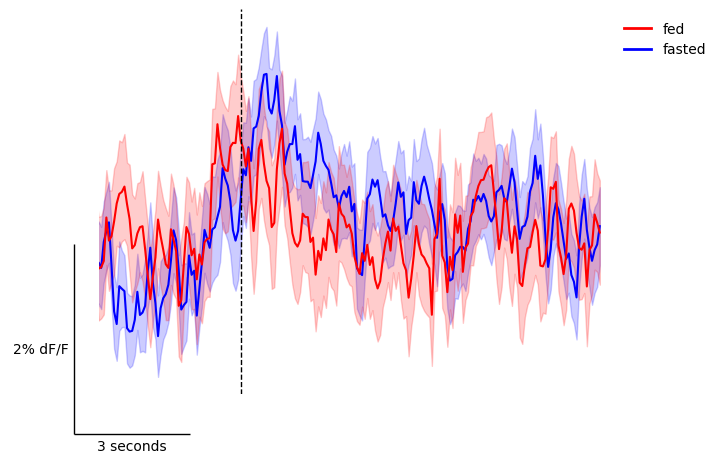

In [30]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_fasted = np.nanmean(all_avg_f, axis=0)
avg_fed = np.nanmean(all_avg_fed, axis=0)
avg_fasted = p2p.moving_average(avg_fasted, window_size = 3) #- np.nanmean(avg_fasted[30:45]) + 1
avg_fed = p2p.moving_average(avg_fed, window_size = 3) #- np.nanmean(avg_fed[30:45]) + 1
ax.plot(np.arange(0, 225), avg_fasted, color = 'blue', label = 'Activated')
ax.plot(np.arange(0, 225), avg_fed, color = 'red', label = 'Inhibited')
ax.fill_between(np.arange(0, 225), avg_fasted - stats.sem(all_avg_f, axis=0), avg_fasted + stats.sem(all_avg_f, axis=0), color = 'blue', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_fed - stats.sem(all_avg_fed, axis=0), avg_fed + stats.sem(all_avg_fed, axis=0), color = 'red', alpha = 0.2)
ax.axvline(x = 85, color = 'black', linestyle = '--', lw = 1)
# ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(left = 30, right = 270)
sb = add_scalebar(ax, matchx=False, sizex=3*15, labelx='3 seconds', matchy=False, sep=4, sizey=0.02, labely='2% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
custom_handles = [
    Line2D([0], [0], color='r', lw=2),
    Line2D([0], [0], color='b', lw=2)
]
custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)


(41, 19, 225)

In [36]:
sucrose_activated_pvals, sucrose_inhibited_pvals, pvals, null_stats, Wobs = c2p.circ_shift(all_f, all_aligned_f, alpha=0.05, base_pre = slice(75, 105), base_post = slice(150, 180),
              stim_pre = slice(75, 105), stim_post = slice(75, 105))



Responsive: 44
Unresponsive: 120
Total: 164
Inhibited: 11
Activated: 33


In [ ]:
sucrose_activated_pvals_fed, sucrose_inhibited_pvals_fed, pvals, null_stats_fed, Wobs_fed = c2p.circ_shift(all_fed, all_aligned_fed, alpha=0.05, base_pre = slice(75, 105), base_post = slice(150, 180),
              stim_pre = slice(75, 105), stim_post = slice(75, 105))


Responsive: 40
Unresponsive: 104
Total: 144
Inhibited: 9
Activated: 31


In [38]:
suc_active = all_avg_f[sucrose_activated_pvals <= 0.05, :]
suc_inactive = all_avg_f[sucrose_inhibited_pvals <= 0.05, :]
suc_active_fed = all_avg_fed[sucrose_activated_pvals_fed <= 0.05, :]
suc_inactive_fed = all_avg_fed[sucrose_inhibited_pvals_fed <= 0.05, :]

Text(0.5, 25.722222222222214, 'Time from First Lick')

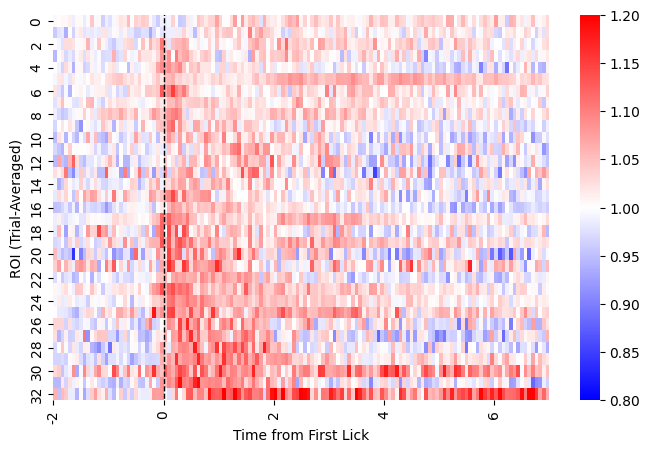

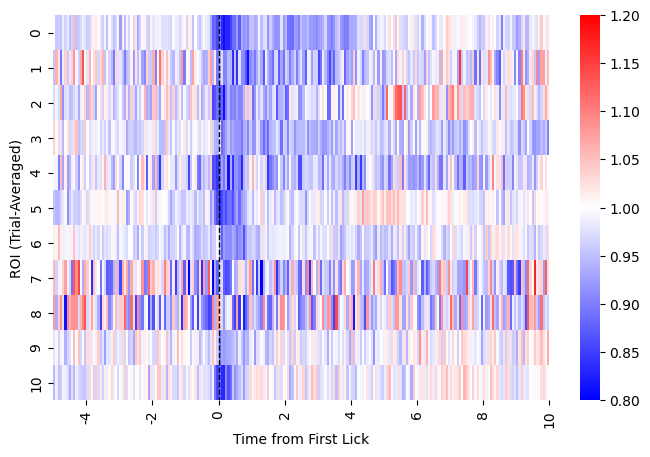

In [39]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_active[:, 75:105], axis=1))
sorted_avg_mean = suc_active[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_active.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_inactive[:, 75:105], axis=1))
sorted_avg_mean = suc_inactive[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_inactive.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")


Text(0.5, 25.722222222222214, 'Time from First Lick')

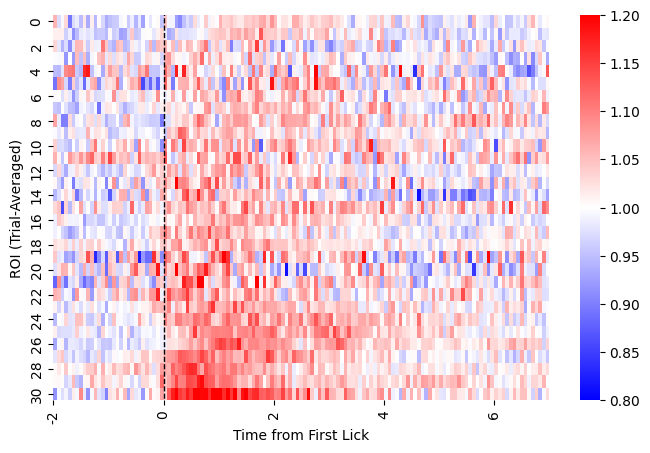

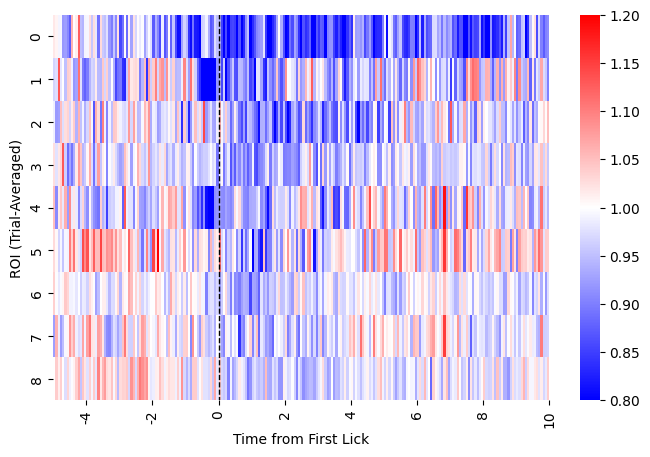

In [40]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_active_fed[:, 75:105], axis=1))
sorted_avg_mean = suc_active_fed[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_active_fed.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(suc_inactive_fed[:, 75:105], axis=1))
sorted_avg_mean = suc_inactive_fed[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = suc_inactive_fed.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")


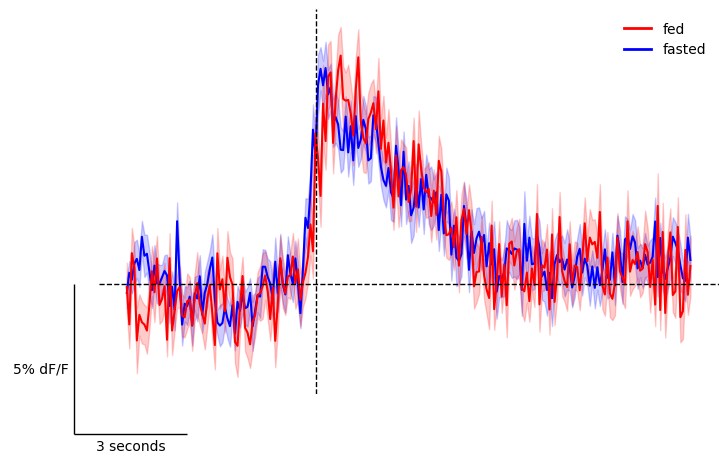

In [43]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated = np.nanmean(suc_active, axis=0)
avg_suc_inhibited = np.nanmean(suc_active_fed, axis=0)
ax.plot(np.arange(0, 225), avg_suc_activated, color = 'blue', label = 'Activated')
ax.plot(np.arange(0, 225), avg_suc_inhibited, color = 'red', label = 'Inhibited')
ax.fill_between(np.arange(0, 225), avg_suc_activated - stats.sem(suc_active, axis=0), avg_suc_activated + stats.sem(suc_active, axis=0), color = 'blue', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited - stats.sem(suc_active_fed, axis=0), avg_suc_inhibited + stats.sem(suc_active_fed, axis=0), color = 'red', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=3*15, labelx='3 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='r', lw=2),
    Line2D([0], [0], color='b', lw=2)
]
custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)



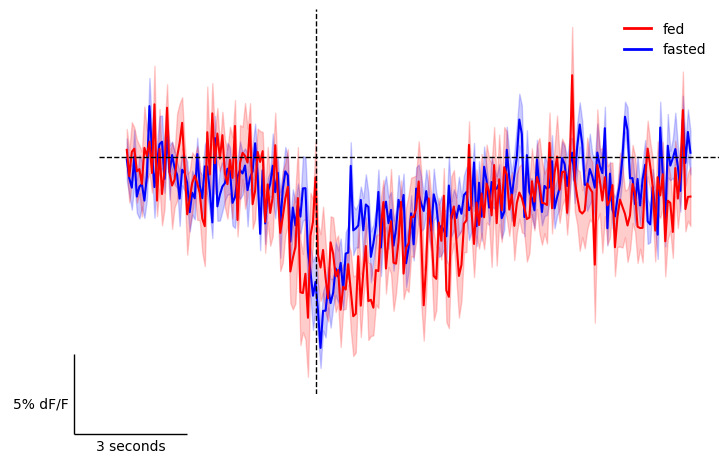

In [44]:
fig, ax = plt.subplots(1, figsize=(8, 5))
avg_suc_activated = np.nanmean(suc_inactive, axis=0)
avg_suc_inhibited = np.nanmean(suc_inactive_fed, axis=0)
ax.plot(np.arange(0, 225), avg_suc_activated, color = 'blue', label = 'Activated')
ax.plot(np.arange(0, 225), avg_suc_inhibited, color = 'red', label = 'Inhibited')
ax.fill_between(np.arange(0, 225), avg_suc_activated - stats.sem(suc_inactive, axis=0), avg_suc_activated + stats.sem(suc_inactive, axis=0), color = 'blue', alpha = 0.2)
ax.fill_between(np.arange(0, 225), avg_suc_inhibited - stats.sem(suc_inactive_fed, axis=0), avg_suc_inhibited + stats.sem(suc_inactive_fed, axis=0), color = 'red', alpha = 0.2)
ax.axvline(x = 75, color = 'black', linestyle = '--', lw = 1)
ax.axhline(y= 1, color = 'black', linestyle = '--', lw = 1)
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
sb = add_scalebar(ax, matchx=False, sizex=3*15, labelx='3 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))

custom_handles = [
    Line2D([0], [0], color='r', lw=2),
    Line2D([0], [0], color='b', lw=2)
]
custom_labels = ['fed', 'fasted']

plt.legend(custom_handles, custom_labels, loc='best', frameon = False)



In [46]:
table = np.array([
    [120, 33, 11],
    [104, 31, 9]
])

# run chi-square test
chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}, p = {p:.3f}, dof = {dof}")
print("Expected counts under independence:")
print(expected)


χ² = 0.11, p = 0.948, dof = 2
Expected counts under independence:
[[119.27272727  34.07792208  10.64935065]
 [104.72727273  29.92207792   9.35064935]]


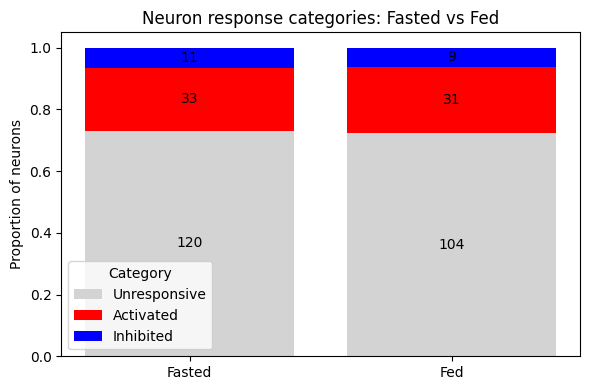

In [51]:
groups     = ['Fasted', 'Fed']
categories = ['Unresponsive', 'Activated', 'Inhibited']
colors     = ['lightgray', 'red', 'blue']

# compute proportions
prop = table / table.sum(axis=1, keepdims=True)

x = np.arange(len(groups))
bottom = np.zeros(len(groups))

fig, ax = plt.subplots(figsize=(6,4))

for j, (cat, color) in enumerate(zip(categories, colors)):
    heights = prop[:, j]
    bars = ax.bar(x, heights, bottom=bottom, label=cat, color=color)
    
    # annotate each segment with the absolute count
    for i, bar in enumerate(bars):
        count = table[i, j]
        # y-position: bottom + half of this bar's height
        y = bottom[i] + heights[i] / 2
        ax.text(
            x[i], y,         # position
            str(count),      # text
            ha='center', va='center'
        )
    
    bottom += heights  # update bottom for next category

# finishing touches
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel('Proportion of neurons')
ax.set_title('Neuron response categories: Fasted vs Fed')
leg = ax.legend(frameon=True, title='Category')

plt.tight_layout()
plt.show()
